In [2]:
#Data analysis for training induced plasticity in auditory  cortex (4x4 paradigm)

# import list
%reload_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
import pandas as pd
#import main_funcs as mfun
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
from datetime import datetime
from scipy import stats
import plot_funcs as pfun
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from mpl_toolkits.mplot3d.proj3d import proj_transform
# from sklearn import preprocessing
# from scipy import stats
# from itertools import compress

import warnings
warnings.filterwarnings("ignore") 

# set matlab API
import matlab.engine
eng = matlab.engine.start_matlab()
print('Matlab engine is set correctly.')
eng.warning('off', 'all', nargout=0)

rootPath = r'D:\trainingInducedPlasticity' # IMPORTANT: update the rootPath
analysis_path = os.path.join(rootPath, 'analysis') 
data_path = os.path.join(rootPath, 'info_data')
savefigsPath     = os.path.join(rootPath, 'figs')
backgroundImage_path = os.path.join(rootPath, 'BFimages')

savefigpath = r'G:\My Drive\Manuscripts\0 Training4by4paper\TrainingInduced_figures'


Matlab engine is set correctly.


In [ ]:
# Plot BF & cortical voronoid maps from matlab code
# Figure 1 & Figure 2 functions are in MATLAB
# explore matlab functions in master_4x4training.m file
eng.plotBestFrequencyMaps(savefigpath,  nargout=0) # run matlab code to get BF plots
eng.corticalMap(backgroundImage_path, savefigpath, nargout=0) # run matlab code to cortical maps
eng.BFComparisonAcrossFields(nargout=0) # for BF comparison across fields
eng.plotMutualInformationBarPlotsWithSubSample(nargout=0) # for MI analysis
eng.plot_PPF_Permutation(savefigpath,  nargout=0) # permutation test for PPF as the sample size is slightly less than other fields

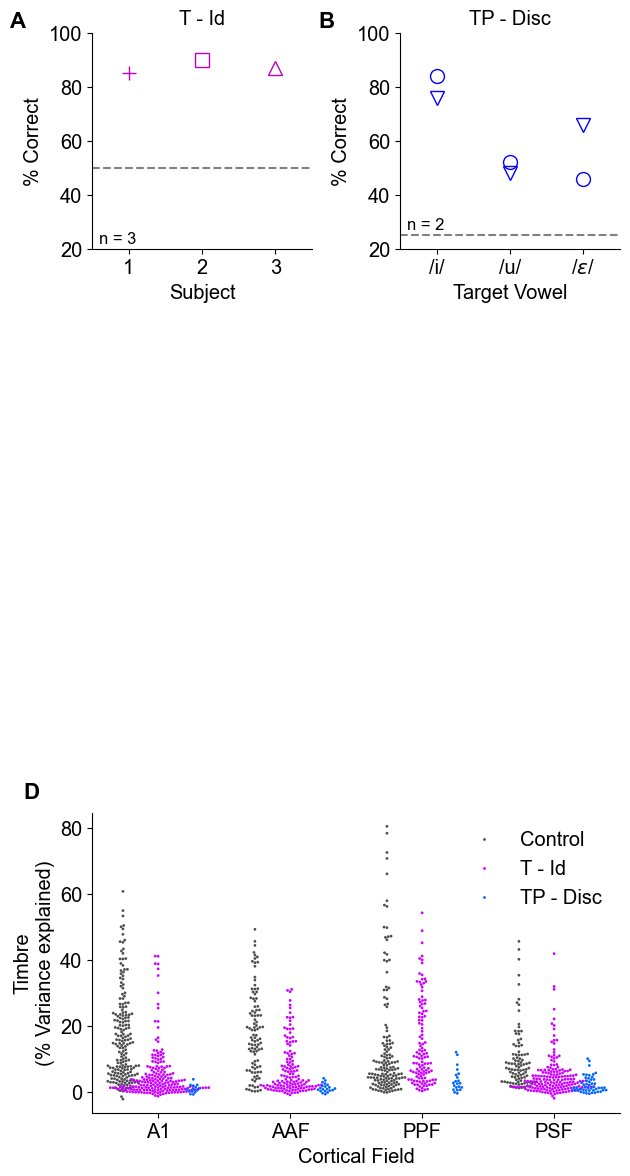

In [4]:
# Figure 3: Timbre Sensitvity
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4) # Leave empty space for cortical map created by MATLAB Code
gs_timbreSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorTimbre (ax_gs_behavior )

# Panel C: plot timbre auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE - created by Matlab code above
# Panel D: plot timbre SSA
ax_gs_timbreSSA = {xx: fig.add_subplot(gs_timbreSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Timbre', ax_gs_timbreSSA[0] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_timbreSSA]

# Corresponding labels
labels = ['A','B', 'D' ]
lInd = 0

for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<2:
            ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>1 and lInd<7:
            ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure3_TimbreRepresentation'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


In [49]:
# Figure 3: GLMM analysis for timbre sensitivity for units
# with variance explained values
pfun.GLMMforSSA(eng, 'Timbre')

                                  Estimate  Std. Error           df  \
(Intercept)                      15.238032    1.486394    31.733882   
TrainingGroupT - Id             -11.019339    2.448393    29.132208   
TrainingGroupTP - Disc          -14.854464    4.101434    80.001160   
FieldAAF                          1.455622    1.311624  1172.334497   
FieldPPF                         -1.199148    1.175334  1176.376335   
FieldPSF                         -6.983012    1.360368  1177.433433   
TrainingGroupT - Id:FieldAAF      0.168995    1.823579  1178.985869   
TrainingGroupTP - Disc:FieldAAF  -1.183698    3.838908  1157.517348   
TrainingGroupT - Id:FieldPPF     10.369471    1.745763  1170.706026   
TrainingGroupTP - Disc:FieldPPF   4.453439    3.856244  1176.113828   
TrainingGroupT - Id:FieldPSF      6.676568    1.812949  1173.030493   
TrainingGroupTP - Disc:FieldPSF   8.780792    3.565419  1178.335832   

                                   t value      Pr(>|t|)  
(Intercept)      

In [51]:
# Supp Figure 3: GLMM analysis for timbre sensitivity for units with BF
pfun.GLMMforSSA_withBF(eng, 'Timbre')

                            Estimate    Std. Error           df    t value  \
(Intercept)             4.989731e-01  1.699090e+00    93.040887   0.293671   
FieldAAF               -2.053987e+00  1.252555e+00  5862.779123  -1.639838   
FieldPPF               -8.475655e-01  1.137337e+00  5870.044419  -0.745219   
FieldPSF               -1.954172e+00  1.111426e+00  5852.471091  -1.758257   
TrainingGroupPitch      2.696496e+00  3.212035e+00    53.497453   0.839498   
TrainingGroupTimbre    -6.275098e-01  2.224801e+00    33.731531  -0.282052   
F1                     -9.902595e-03  2.920884e-03  5710.974060  -3.390274   
F2                      1.079412e-02  8.130847e-04  5710.974046  13.275513   
BF                      9.523459e-02  9.054968e-02  5768.144240   1.051739   
TrainingGroupPitch:F1   2.717696e-03  3.023711e-03  5710.974178   0.898795   
TrainingGroupTimbre:F1  1.742679e-02  1.541700e-03  5710.974164  11.303619   
TrainingGroupPitch:F2  -1.075201e-02  1.158511e-03  5710.974172 

In [40]:
# Figure 4: Timbre-Formant Analysis
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16*0.8, 12*0.8))

# set gridspecs
vowel_samples = fig.add_gridspec(ncols=2, nrows=1, bottom=0.8, top=1, right=0.43, left=0.05,
                              wspace=0.3, hspace=0.4)
gs_f2SSA      = fig.add_gridspec(ncols=1, nrows=2, bottom=0.5, top=1, right=0.95, left=0.53,
                              wspace=0.2, hspace=0.4)

# prediction_3d = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.65, right=0.44, left=0.05,
#                               wspace=0.05, hspace=0.05)
# colorbar_3d = fig.add_gridspec(ncols=1, nrows=1, bottom=0.45, top=0.65, right=0.48, left=0.46,
#                               wspace=0, hspace=0)
prediction_2d = fig.add_gridspec(ncols=2, nrows=1, bottom=0.5, top=0.7, right=0.44, left=0.05,
                              wspace=0.1, hspace=0.4)

gs_timbreSSA_acrossfields = fig.add_gridspec(ncols=1, nrows=3, bottom=0.0, top=0.4, right=0.9, left=0.1,
                                wspace=0.2, hspace=0.05)

# Panel A - B:  plot vowel samples
ax_vowel_samples = {xx: fig.add_subplot(vowel_samples[xx]) for xx in range(2)}
pfun.plotVowelSamples (ax_vowel_samples )

# Panel C: plot F2 SSA
ax_gs_f2SSA = {xx: fig.add_subplot(gs_f2SSA[xx]) for xx in range(2)}
pfun.plotVowelSSA (eng, 'Timbre',ax_gs_f2SSA[0] , indexOrder = 'F2')
pfun.plotVowelSSA (eng, 'Timbre',ax_gs_f2SSA[1] , indexOrder = 'F1')

# Panel D-E-F: plot prediction 3d results - Not used anymore
# pfun.plotPrediction3d (eng, ax_prediction_3d, colorbar_3d ) # This is for prediction maps excluded from the main figure

# Panel G-H: plot prediction 2d results
ax_prediction_2d = {xx: fig.add_subplot(prediction_2d[xx]) for xx in range(2)}
pfun.plotPrediction2d (eng, ax_prediction_2d )

# Panel I: plot timbre SSA across fields
ax_gs_timbreSSA_acrossfields = {xx: fig.add_subplot(gs_timbreSSA_acrossfields[xx]) for xx in range(3)}
pfun.plotVowelSSAacrossTrainingGroups (eng,  'Control', ax_gs_timbreSSA_acrossfields[0] )
pfun.plotVowelSSAacrossTrainingGroups (eng,  'Timbre',  ax_gs_timbreSSA_acrossfields[1] )
pfun.plotVowelSSAacrossTrainingGroups (eng,  'Pitch',   ax_gs_timbreSSA_acrossfields[2] )

# List of your gridspecs
axes = [ax_vowel_samples, ax_gs_f2SSA, ax_prediction_2d,  ax_gs_timbreSSA_acrossfields]

# Corresponding labels
labels = ['A','B','C','','D', 'E','F',' ',' ']#,'G','H','I' ]
lInd = 0

for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<13: # for 3d plots - axis in Adobe Illustrator
            ax[key].text(-0.15, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))   
        # elif lInd==8:
        #     ax[key].text(-0.05, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
        #                 fontweight='bold', va='top', ha='right',
        #                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        # elif (lInd >5) and (lInd<9): 
        #     ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
        #                 fontweight='bold', va='top', ha='right',
        #                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

plt.tight_layout()
savefigname = 'Figure4_FormantRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Some predictor variables are on very different scales: consider rescaling 

R[write to console]: 2: Some predictor variables are on very different scales: consider rescaling 

R[write to console]: 3: 
R[write to console]: In pred + REvals :
R[write to console]: 
 
R[write to console]:  longer object length is not a multiple of shorter object length



In [14]:
# Figure 4: GLMM analysis for timbre sensitivity for vowel pairs
# with variance explained values for vowel pairs
pfun.GLMM_timbreSSA (eng, savefigpath)

R[write to console]: 
Correlation matrix not shown by default, as p = 19 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
"Value ~ Field + TrainingGroup + F1 + F2 + TrainingGroup:F1 + TrainingGroup:F2 + Field:F1 + Field:F2 + F1:F2 + (1|Unit) + (1|Penetration)"
   Data: structure(list(TrainingGroup = c("Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control", "Control", "Control", "Control", "Control", "Control",  
"Control

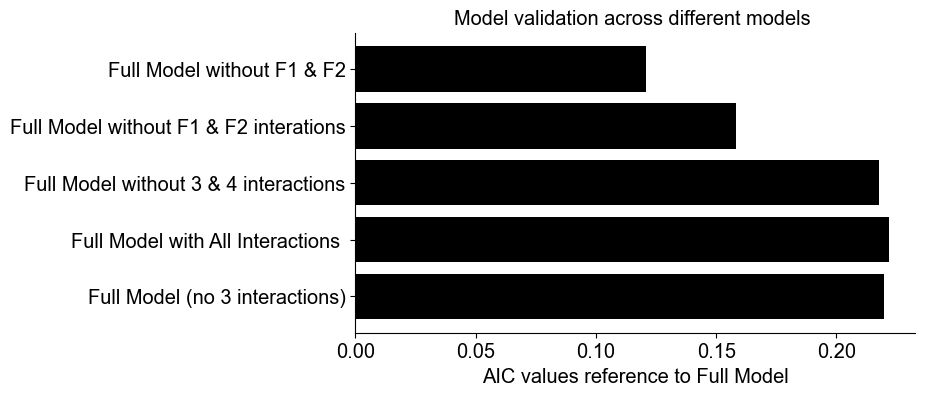

In [6]:
# Figure 4: GLMM model comparisons 
#### Supplementary figure for timbre 
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))
gs_validation  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.70, top=0.95, right=0.40, left=0.05,
                              wspace=0.4, hspace=0.4)
# Panel A - Only panel
ax_gs_validation = {xx: fig.add_subplot(gs_validation[xx]) for xx in range(1)}
pfun.plotValidationForMixedEffectModel ( eng, ax_gs_validation[0])
plt.tight_layout()
savefigname = 'Figure4_SupplementaryModelValidationForFormantGLMM'
pfun.save_figure(savefigname,savefigpath)
#plt.close()

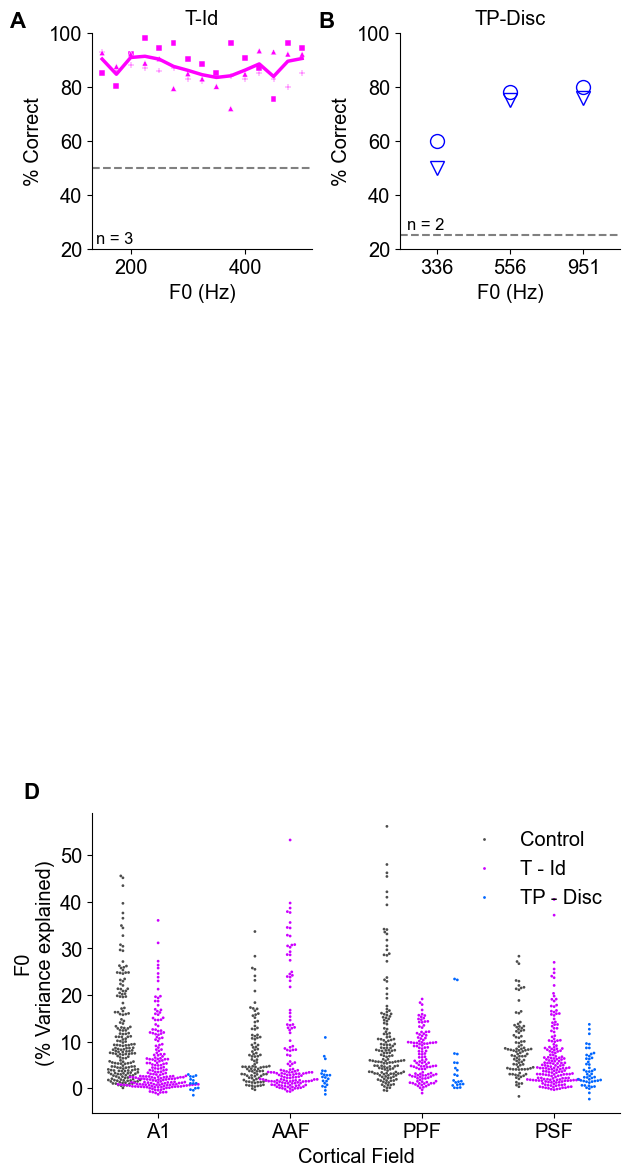

In [63]:
# Figure 5: Pitch/F0 Sensitivity
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code
gs_pitchSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorPitch (ax_gs_behavior )

# Panel C: plot pitch auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE
# Panel D: plot pitch SSA
ax_gs_pitchSSA = {xx: fig.add_subplot(gs_pitchSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'F0', ax_gs_pitchSSA[0] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_pitchSSA]

# Corresponding labels
labels = ['A','B', 'D']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<2:
            ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure5_PitchRepresentationBase'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


In [36]:
#Figure 5: GLM analysis for Pitch/F0 sensitivity
pfun.GLMMforSSA(eng, 'F0')

R[write to console]: boundary (singular) fit: see help('isSingular')



                                Estimate  Std. Error           df    t value  \
(Intercept)                    11.159779    0.799207    45.413314  13.963556   
TrainingGroupT 2AFC            -6.330443    1.253615    32.462391  -5.049750   
TrainingGroupT/P GNG          -11.245806    2.609699   170.551655  -4.309234   
FieldAAF                       -3.585264    1.024185  1252.400115  -3.500602   
FieldPPF                       -0.565624    0.914721  1239.165469  -0.618357   
FieldPSF                       -2.029715    1.057430  1230.247716  -1.919480   
TrainingGroupT 2AFC:FieldAAF    7.065233    1.390551  1226.721694   5.080888   
TrainingGroupT/P GNG:FieldAAF   5.187529    3.017064  1232.910958   1.719397   
TrainingGroupT 2AFC:FieldPPF    1.090114    1.337235  1252.286931   0.815200   
TrainingGroupT/P GNG:FieldPPF   5.124992    3.003808  1247.290601   1.706165   
TrainingGroupT 2AFC:FieldPSF    3.098314    1.362797  1249.123899   2.273496   
TrainingGroupT/P GNG:FieldPSF   5.963437

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')



Cross-validated RMSE: 8.33
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Control  T 2AFC  -3.1495    0.0 -4.3074 -1.9915   True
Control T/P GNG  -6.6694    0.0 -8.7771 -4.5617   True
 T 2AFC T/P GNG  -3.5199 0.0002 -5.6025 -1.4373   True
------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    A1    AAF  -0.2823 0.9767 -2.0527  1.4882  False
    A1    PPF   0.7015 0.7161 -1.0066  2.4095  False
    A1    PSF  -1.1051 0.3188 -2.7676  0.5574  False
   AAF    PPF   0.9838  0.541 -0.9126  2.8801  False
   AAF    PSF  -0.8228 0.6642 -2.6782  1.0325  False
   PPF    PSF  -1.8066  0.048 -3.6026 -0.0106   True
----------------------------------------------------
Post-hoc comparison for Field within A1:
  Multiple Compar

Marginal R-squared: [0.9878802]
Conditional R-squared: [0.06957229]


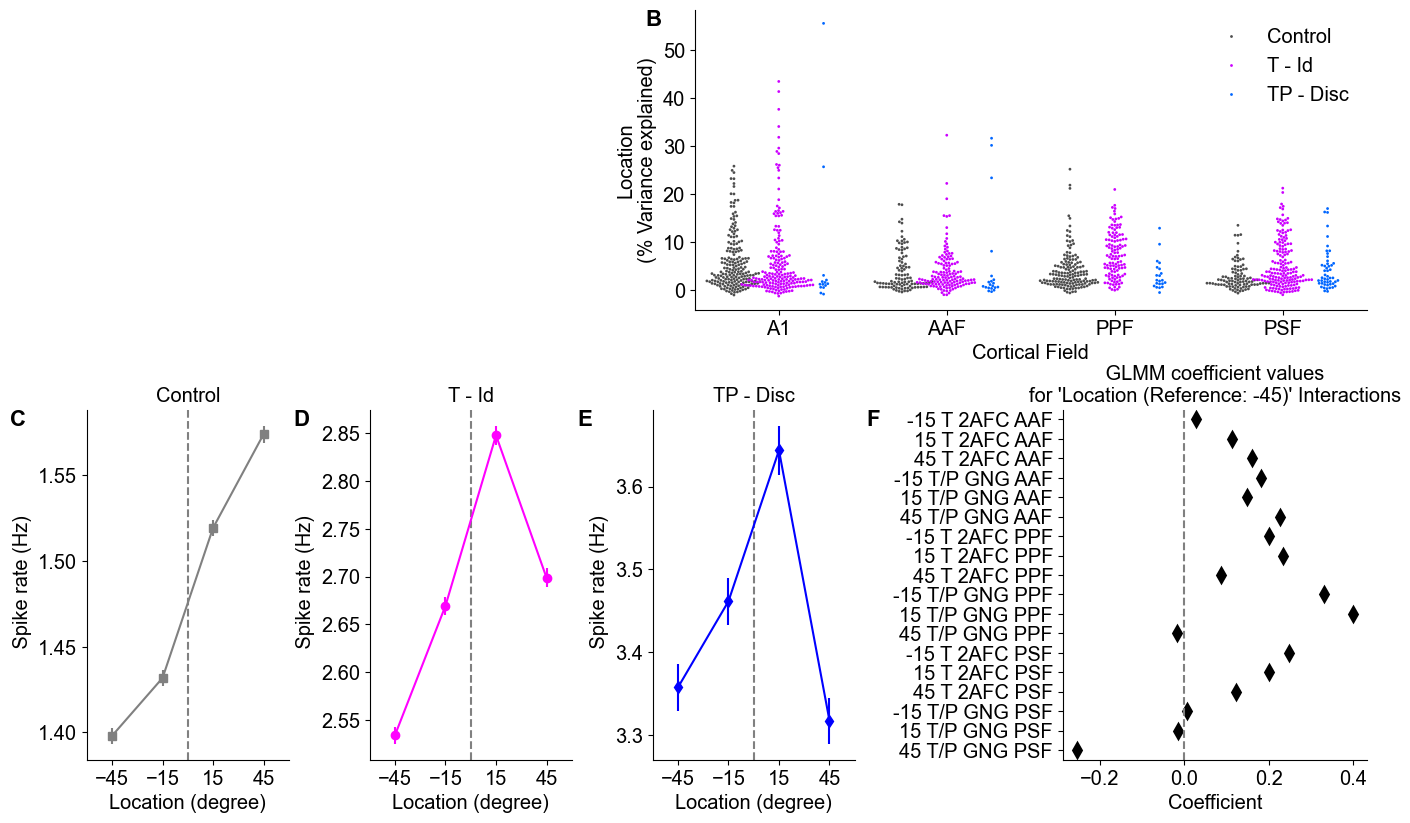

In [67]:
# Figure 6: Location Sensitivity
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 10))

# set gridspecs

gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.50, top=0.80, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code above

gs_locationSSA       =  fig.add_gridspec(ncols=1, nrows=1, bottom=0.50, top=0.80, right=0.85, left=0.43,
                              wspace=0.4, hspace=0.2)

gs_locationSpikeRates = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.40, right=0.53, left=0.05,
                              wspace=0.4, hspace=0.2)

gs_locationGLM        = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.40, right=0.85, left=0.66,
                              wspace=0.2, hspace=0)

# Panel A: plot pitch auditory cortex maps : THIS WILL BE A SEPARATE FIGURE created by MATLAB code above
# Panel B: plot pitch SSA
ax_gs_locationSSA = {xx: fig.add_subplot(gs_locationSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Location', ax_gs_locationSSA[0] )

# Panel C: normalisation panels
ax_gs_locationSpikeRates = {xx: fig.add_subplot(gs_locationSpikeRates[xx]) for xx in range(3)}
pfun.plotSRNormalisation (eng,  'Location', ax_gs_locationSpikeRates )

# Panel D: GLM panels
ax_gs_locationGLM = {xx: fig.add_subplot(gs_locationGLM[xx]) for xx in range(1)}
pfun.plotCoefForGLMM_spikeData ( eng, 'Location', ax_gs_locationGLM[0], savefigpath)

# Lets add the labels
axes = [ax_gs_locationSSA, ax_gs_locationSpikeRates, ax_gs_locationGLM]
labels = ['B','C','D','E','F']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd==0:
            ax[key].text(-0.05, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif (lInd>0 and lInd<4):
            ax[key].text(-0.3, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>3:
            ax[key].text(-0.6,1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure6_LocationRepresentation'
pfun.save_figure(savefigname,savefigpath)
#plt.close()


In [37]:
#Figure 6: GLM analysis for location sensitivity
pfun.GLMMforSSA(eng, 'Location')

                               Estimate  Std. Error           df   t value  \
(Intercept)                    5.664374    0.586416    46.223922  9.659303   
TrainingGroupT 2AFC           -0.082701    0.931247    35.624566 -0.088807   
TrainingGroupT/P GNG          -0.237083    1.855655   156.556866 -0.127762   
FieldAAF                      -2.178171    0.681501  1074.707330 -3.196135   
FieldPPF                      -1.675746    0.603427   897.870242 -2.777047   
FieldPSF                      -3.182574    0.707683  1121.688194 -4.497175   
TrainingGroupT 2AFC:FieldAAF  -0.102768    0.925426  1034.576229 -0.111050   
TrainingGroupT/P GNG:FieldAAF  0.951041    1.988905   921.298928  0.478173   
TrainingGroupT 2AFC:FieldPPF   2.543965    0.887738  1029.416271  2.865670   
TrainingGroupT/P GNG:FieldPPF -0.502871    1.984881   930.755943 -0.253351   
TrainingGroupT 2AFC:FieldPSF   2.426455    0.905781  1044.669335  2.678854   
TrainingGroupT/P GNG:FieldPSF  1.879242    1.863353  1164.276195

In [9]:
#### Supplementar figure for location
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))
gs_validation  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.70, top=0.95, right=0.40, left=0.05,
                              wspace=0.4, hspace=0.4)
# Panel A - Only panel
ax_gs_validation = {xx: fig.add_subplot(gs_validation[xx]) for xx in range(1)}
cv = pfun.plotValidationForGLMM_spikeData ( eng, 'Location', ax_gs_validation[0])
plt.tight_layout()
savefigname = 'Figure6_SupplementaryModelValidation'
pfun.save_figure(savefigname,savefigpath)
plt.close()

<Figure size 1600x1200 with 0 Axes>

In [ ]:
# Swarmpot for SSA data for all features

# Get data from Matlab structure in numpy arrays
timbre_data = np.array(eng. prepareSSAData('Timbre', nargout=1))
pitch_data = np.array(eng. prepareSSAData('Pitch', nargout=1))
control_data = np.array(eng. prepareSSAData('Control', nargout=1))

# Define the fields and their corresponding codes in column 7 of the data
fields = {1: 'A1', 2: 'AAF', 3: 'PPF', 4: 'PSF'}

# Define the auditory features 
range_names = ['Timbre', 'F0', 'Space']#, 'Space-F0', 'Space-Timbre', 'F0-Timbre']
colors =[(0.3, 0.3, 0.3), (0.8, 0, 1), (0, 0.4, 1)]

# Create the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 12)) # Adjust the size as needed
axs = axs.flatten() # Flatten the array to make it easier to index
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Iterate over the ranges and fields to plot
for i, range_name in enumerate(range_names):
    ax = axs[i]

    # We will collect the box plot data and positions here
    box_data = []

    # Prepare data for boxplot for each field
    for j, (field_code, field_name) in enumerate(fields.items(), start=1):
        # Check if there is data for the given field in the Control dataset
        if np.any(control_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = np.log(control_data[control_data[:, 6] == field_code, i] + 100)
            df['Type'] = 'Control'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Timbre dataset
        if np.any(timbre_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = np.log(timbre_data[timbre_data[:, 6] == field_code, i] + 100 )
            df['Type'] = '2 AFC'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Pitch dataset
        if np.any(pitch_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = np.log(pitch_data[pitch_data[:, 6] == field_code, i] + 100)
            df['Type'] = 'T/P GNG'
            df['Field'] = field_name
            box_data.append(df)

    # Concatenate all dataframes
    all_data = pd.concat(box_data)
    all_data = all_data.dropna()

    # Plot the boxplot using seaborn
    sns.swarmplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, size = 3, dodge=True)
    #boxplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, showfliers=False )
    # Set the title for each subplot
   # ax.set_title(range_name)
  #  ax.set_ylabel('% Variance explained')
    # Print Stats
    all_data['Value'], fitted_lambda = stats.yeojohnson(all_data['Value'])
    print(fitted_lambda)
    print('Stats for ' + range_name)
    d, p_value = stats.kstest(all_data['Value'].dropna(), 'norm')
    print("KS test statistic: ", d)
    print("KS p-value: ", p_value)
    shapiro_test = stats.shapiro(all_data['Value'].dropna())
    print("Shapiro test statistic: ", shapiro_test[0])
    print("Shapiro p-value: ", shapiro_test[1])

    ks_stat, p_value = lilliefors(all_data['Value'].dropna())
    print("Lilliefors test statistic: ", ks_stat)
    print("Lilliefors p-value: ", p_value)
    control = all_data[all_data['Type'] == 'Control']['Value'].dropna()
    T_2AFC = all_data[all_data['Type'] == '2 AFC']['Value'].dropna()
    T_P_GNG = all_data[all_data['Type'] == 'T/P GNG']['Value'].dropna()

    levene_test = stats.levene(control, T_2AFC, T_P_GNG, center='mean')

    print("Levene test statistic: ", levene_test[0])
    print("Levene p-value: ", levene_test[1])

    print('ANOVA RESULTS')
    
    model = ols('Value ~ C(Type) + C(Field) + C(Type):C(Field)', data=all_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    print ('Posthoc results')
    posthoc_Type = pairwise_tukeyhsd(
    endog=all_data['Value'],     # Data
    groups=all_data['Type'],   # Groups
    alpha=0.05)                  # Significance level

    print(posthoc_Type)

# For 'Field'
    posthoc_Field = pairwise_tukeyhsd(
        endog=all_data['Value'],     # Data
        groups=all_data['Field'],   # Groups
        alpha=0.05)                  # Significance level

    print(posthoc_Field)
    

# Set a super title for the entire figure
plt.suptitle('Parameter Variance by Field')
plt.show()

plt.tight_layout()
savefigname = 'SSA_swarmplots'
pfun.save_figure(savefigname,savefigpath)
plt.close()


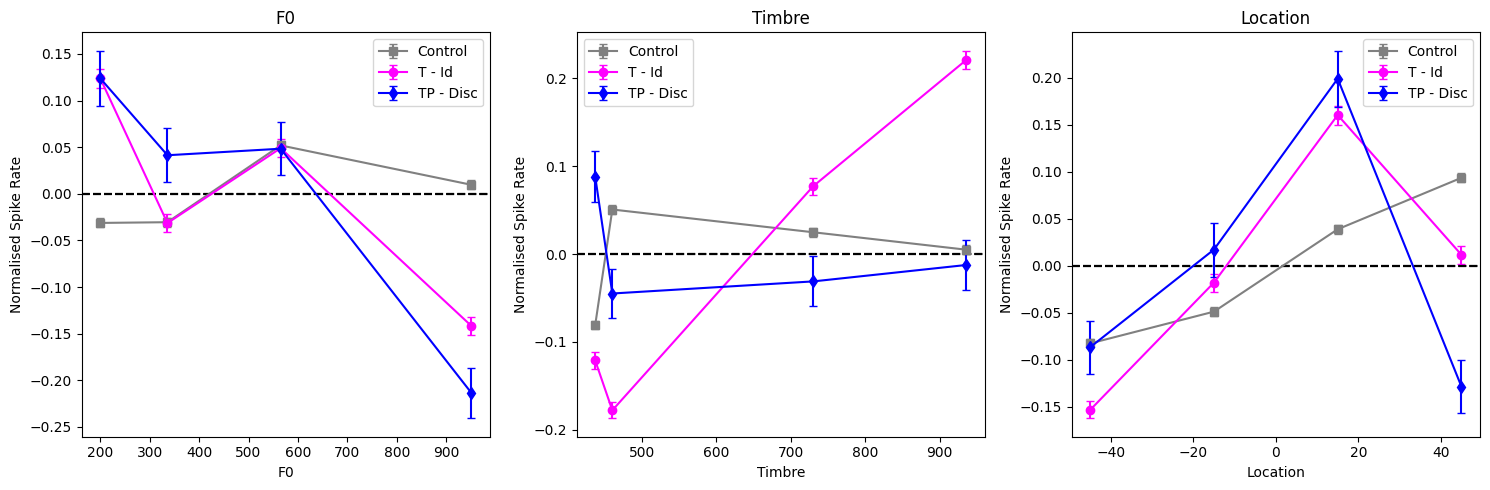

In [14]:
# Normalisation spike rate plots for all features
# BF distributions across fields
    # Define the feature types and training groups

# Create a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for featureType in ['F0', 'Timbre','Location']:
    if featureType == 'Location':  # Space 0, F0 1, Timbre 2
        featureInd = 0
    elif featureType == 'F0':
        featureInd = 1
    elif featureType == 'Timbre':
        featureInd = 2
    trainingGroups = ['Control', 'Timbre', 'Pitch']
    trainingGroups_title = ['Control', 'T - Id', 'TP - Disc']


    markers = {'Control': 's-', 'Timbre': 'o-', 'Pitch': 'd-'}
    colors = {'Control': 'gray', 'Timbre': 'magenta', 'Pitch': 'blue'}
    ax = axes[featureInd-1]
    for i, group_type in enumerate(trainingGroups):
        
        spon = np.array(eng.extractData(group_type, 'spon'))
        resp = np.array(eng.extractData(group_type, 'resp'))
        normalised = resp-np.mean(resp)
        matStim = np.array(eng.extractData(group_type, 'stim'))
        
        # Get unique subFeatures from matStim
        subFeatures = np.unique(matStim[:, featureInd])
        
        # Calculate the mean response for each feature
        mean_responses = []
        sem_responses = []
        for feature in subFeatures:
            # Select the responses corresponding to the current feature
            indices = np.where(matStim[:, featureInd] == feature)
            response = normalised[indices]
            mean_response = np.mean(response, axis=0)
            sem_response  = np.std(response, axis=0) / np.sqrt(len(response))
            mean_responses.append(mean_response)
            sem_responses.append(sem_response)
        
        # Plot the tuning curve
        mean_responses = np.array(mean_responses).flatten()
        sem_responses = np.array(sem_responses).flatten()
        #ax.plot(subFeatures, mean_responses, markers[group_type], color=colors[group_type], label=trainingGroups_title[i])
        ax.errorbar(subFeatures, mean_responses, yerr=sem_responses, fmt=markers[group_type],
                color=colors[group_type], label=trainingGroups_title[i], capsize=3)
        ax.set_title(featureType)
        ax.set_xlabel(featureType)
        ax.set_ylabel('Normalised Spike Rate')
     #   ax.set_ylim(-0.25, 0.25)
        # add a line at y = 0
        ax.axhline(y=0, color='k', linestyle='--')
        ax.legend()

plt.tight_layout()
savefigpath = r'G:\My Drive\Manuscripts\1 Training4by4paper\TrainingInduced_figures'
savefigname = 'normalisedPlots2'
pfun.save_figure(savefigname,savefigpath)